Nombre: Jessica Méndez

Materia: PLN, Visión y Ética Computacional

02 de Febrero de 2023


---

**Tecmilenio y la creadora del presente notebook, no guarda relación alguna con las marcas mencionadas como ejemplo. Las marcas son propiedad de sus titulares conforme a la legislación aplicable, se utilizan con fines académicos y didácticos, por lo que no existen fines de lucro, relación publicitaria o de patrocinio.

---

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


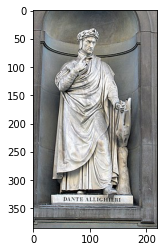

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/220px-Dante_Alighieri01.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

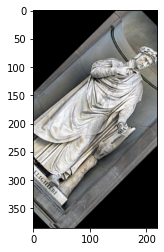

In [ ]:
centro = (img.shape[1]//2,img.shape[0]//2)
matriz_rot = cv.getRotationMatrix2D(centro,-45,1)
img_rot = cv.warpAffine(img, matriz_rot,(img.shape[1],img.shape[0]))
plt.imshow(img_rot, cmap='gray')

Las dimensiones de la imagen nueva son :  (388, 388)


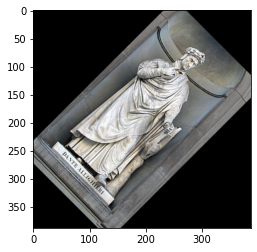

In [ ]:
from numpy.core.multiarray import min_scalar_type
import numpy as np

esq_orig = [(0,0,1),(350,0,1),(0,200,1),(350,200,1)]
esq_nueva = [np.matmul(matriz_rot,pt) for pt in esq_orig]

min_x=np.min([pt[0] for pt in esq_nueva])
max_x=np.max([pt[0] for pt in esq_nueva])

min_y=np.min([pt[1] for pt in esq_nueva])
max_y=np.max([pt[1] for pt in esq_nueva])

dim_nueva=(int(max_y-min_y),int(max_x-min_x) )

print('Las dimensiones de la imagen nueva son : ', dim_nueva)

centro_nuevo = (dim_nueva[0]//2, dim_nueva[1]//2)
tras_Centro = (centro_nuevo[0] - centro[0], centro_nuevo[1] - centro[1])

matriz_rot[0][2] += tras_Centro[0]
matriz_rot[1][2] += tras_Centro[1]

img_rot2 = cv.warpAffine(img, matriz_rot,dim_nueva)
plt.imshow(img_rot2,cmap = 'gray')


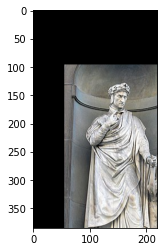

In [ ]:
alto, ancho = img.shape[:2]
tx, ty = ancho/4, alto/4 
matriz_tras = np.array([[1,0,tx],[0,1,ty]], dtype=np.float32)
img_tras =  cv.warpAffine(src = img, M=matriz_tras, dsize=(ancho, alto))
plt.imshow(img_tras, cmap='gray')

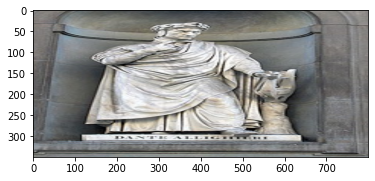

In [ ]:
ancho_red = 800
alto_red = 350
puntos_red = (ancho_red, alto_red)
img_red = cv.resize(img, puntos_red, interpolation=cv.INTER_LINEAR)
plt.imshow(img_red, cmap = 'gray')

Altura y ancho de la imagen original 385 x 220
Altura y ancho de la imagen original 192 x 110


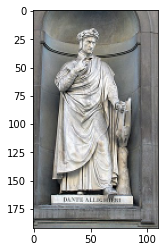

In [ ]:
h,w,c =img.shape
print("Altura y ancho de la imagen original", h, "x",w)

esca_red_x = 0.5
esca_red_y = 0.5

img_red = cv.resize(img, None, fx=esca_red_x, fy=esca_red_y, interpolation =cv.INTER_AREA)
plt.imshow (img_red, cmap='gray')
h,w,c = img_red.shape
print("Altura y ancho de la imagen original", h, "x",w)